# Breast Cancer Wisconsin (Diagnostic) Classification

## Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

## Split Dataset into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## Train and Evaluate Model

### k-Nearest Neighbors (KNN)

In [8]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    training_accuracy.append(knn_model.score(X_train, y_train))
    test_accuracy.append(knn_model.score(X_test, y_test))

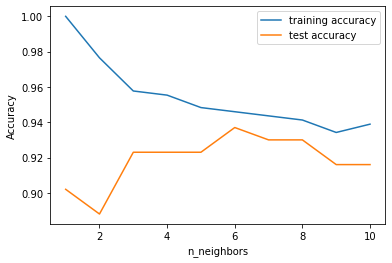

In [10]:
# Visualization
from matplotlib import pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Logistic Regression

In [11]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [12]:
# Logistic Regression (C=1)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="lbfgs", max_iter=100000)
lr_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model.n_iter_))

Training set score: 0.958
Test set score: 0.958
Number of iterations: [1897]


In [13]:
# Logistic Regression (C=100)
lr_model100 = LogisticRegression(C=100, solver="lbfgs", max_iter=100000)
lr_model100.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model100.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model100.n_iter_))

Training set score: 0.984
Test set score: 0.965
Number of iterations: [2959]


In [14]:
# Logistic Regression (C=0.01)
lr_model001 = LogisticRegression(C=0.01, solver="lbfgs", max_iter=100000)
lr_model001.fit(X_train, y_train)

print("Training set score: {:.3f}".format(lr_model001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr_model001.score(X_test, y_test)))
print("Number of iterations: {}".format(lr_model001.n_iter_))

Training set score: 0.953
Test set score: 0.951
Number of iterations: [446]


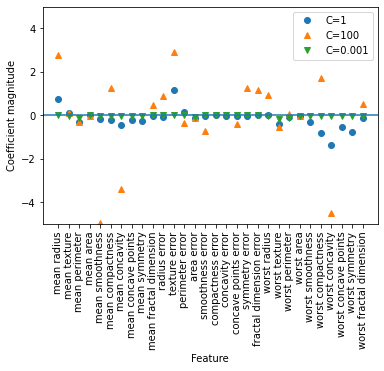

In [15]:
# Visualization
plt.plot(lr_model.coef_.T, 'o', label="C=1")
plt.plot(lr_model100.coef_.T, '^', label="C=100")
plt.plot(lr_model001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

### Decision Tree

In [16]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [17]:
# Decision Tree Classifier (max_depth=none)
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(tree_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree_model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.937


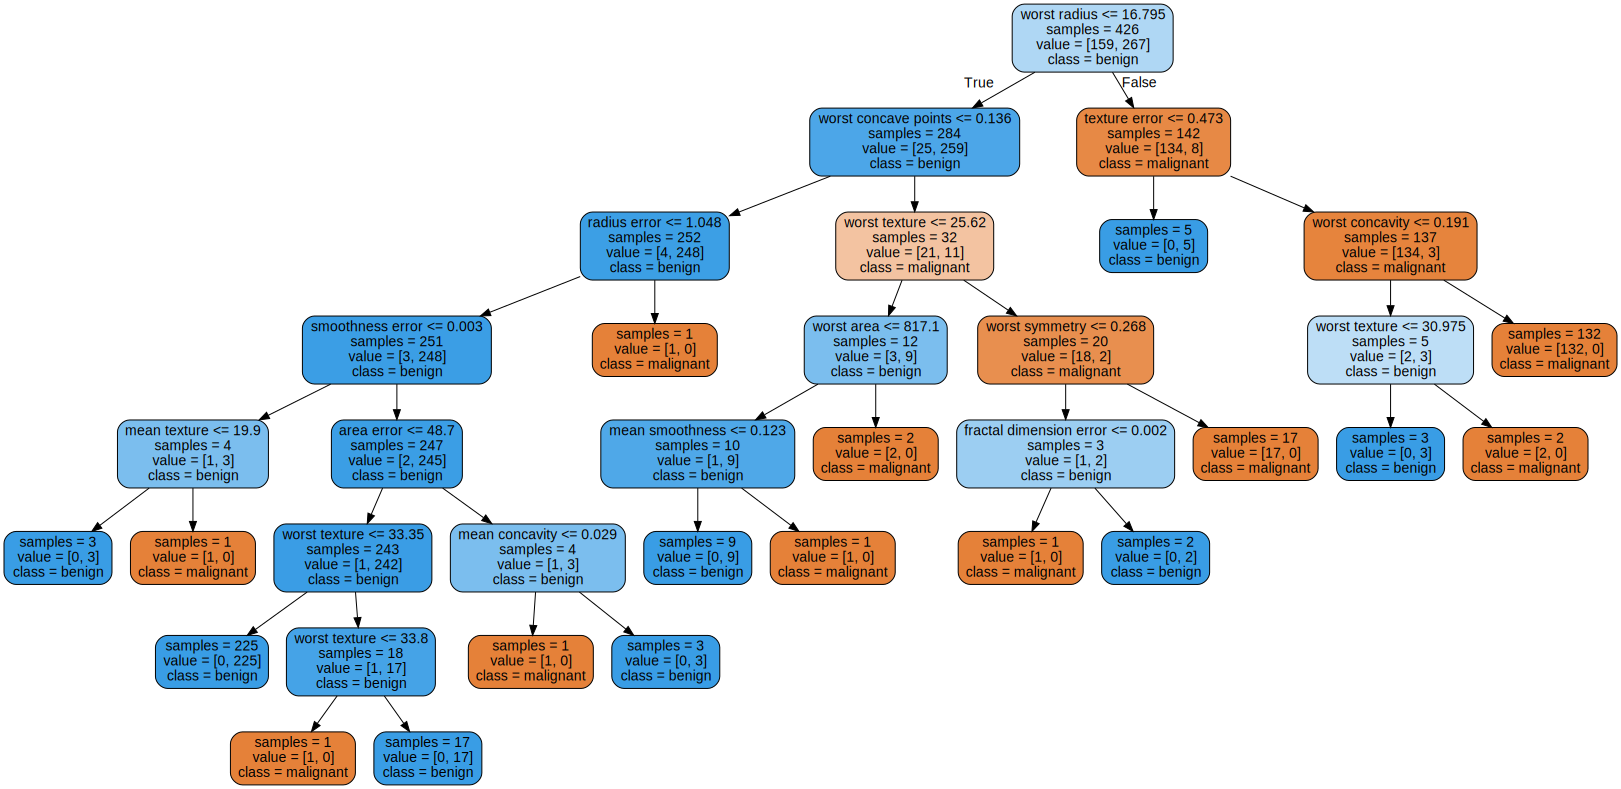

In [18]:
# Visualization
import os
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_model, out_file="./tree.dot", feature_names=cancer.feature_names,
                class_names=cancer.target_names, rounded=True, filled=True, impurity=False)

with open("./tree.dot") as f:
    dot_graph = f.read()

os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
display(graphviz.Source(dot_graph))

In [19]:
# Pre-pruning Decision Tree Classifier (max_depth=4)
tree_model_pruned = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_model_pruned.fit(X_train, y_train)

print("Training set score: {:.3f}".format(tree_model_pruned.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree_model_pruned.score(X_test, y_test)))

Training set score: 0.988
Test set score: 0.951


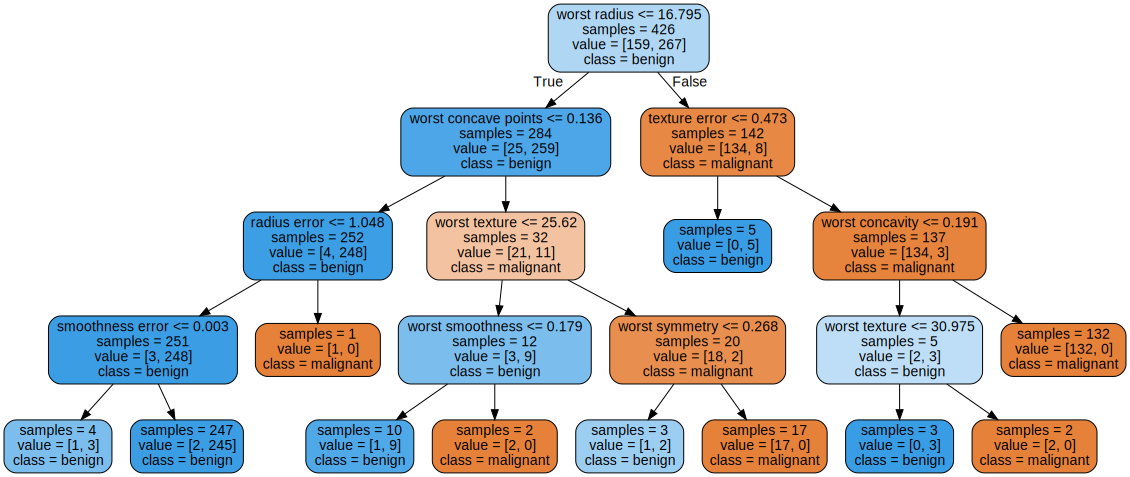

In [20]:
# Visualization
export_graphviz(tree_model_pruned, out_file="./tree_pruned.dot", feature_names=cancer.feature_names,
                class_names=cancer.target_names, rounded=True, filled=True, impurity=False)

with open("./tree_pruned.dot") as f:
    dot_graph = f.read()

os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
display(graphviz.Source(dot_graph))

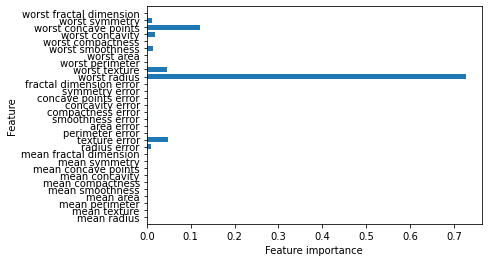

In [21]:
# Feature Importances
import numpy as np


def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_cancer(tree_model_pruned)

### Random Forest

In [22]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [23]:
# Random Forest Classifier (n_estimators=100)
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(random_forest_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(random_forest_model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.972


### Gradient Boosting

In [24]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [25]:
# Gradient Boosting Classifier (n_estimators=100, max_depth=3)
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(random_state=0)
gradient_boosting_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(gradient_boosting_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradient_boosting_model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.965


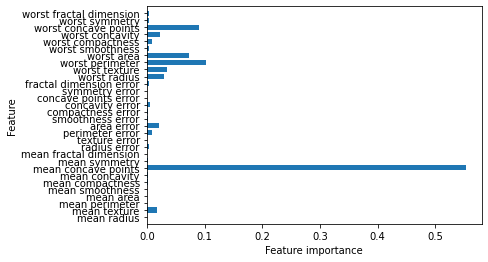

In [26]:
# Visualization
plot_feature_importances_cancer(gradient_boosting_model)

In [27]:
# Gradient Boosting Classifier (n_estimators=100, max_depth=1)
gradient_boosting_model_depth1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gradient_boosting_model_depth1.fit(X_train, y_train)

print("Training set score: {:.3f}".format(gradient_boosting_model_depth1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradient_boosting_model_depth1.score(X_test, y_test)))

Training set score: 0.991
Test set score: 0.972


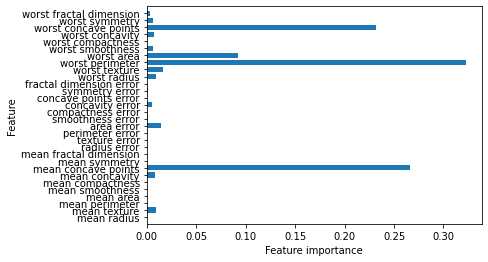

In [28]:
# Visualization
plot_feature_importances_cancer(gradient_boosting_model_depth1)

In [29]:
# Gradient Boosting Classifier (n_estimators=100, max_depth=3, learning_rate=0.03)
gradient_boosting_model_rate003 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.03)
gradient_boosting_model_rate003.fit(X_train, y_train)

print("Training set score: {:.3f}".format(gradient_boosting_model_rate003.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gradient_boosting_model_rate003.score(X_test, y_test)))

Training set score: 0.998
Test set score: 0.965


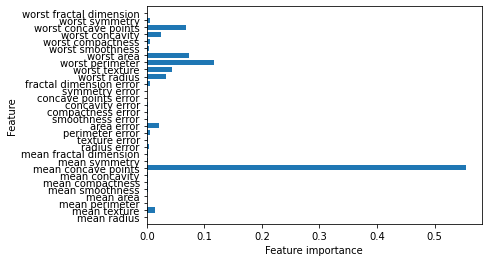

In [30]:
# Visualization
plot_feature_importances_cancer(gradient_boosting_model_rate003)

### Support Vector Machines

In [31]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [32]:
# Support Vector Machine Classifier (kernel='rbf', C=100, gamma="auto")
# This model is overfitted to the training set.
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=100, gamma="auto", random_state=0)
svm_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.629


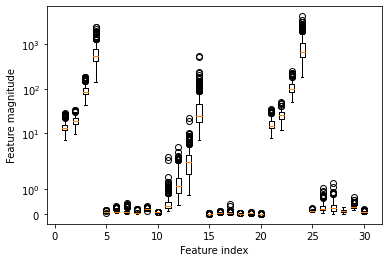

In [33]:
# Visualization
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

In [34]:
# Scaling Dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Support Vector Machine Classifier (kernel='rbf', C=100, gamma="auto")
# This model is using the scaled dataset.
svm_model_scaled = SVC(kernel='rbf', C=100, gamma="auto", random_state=0)
svm_model_scaled.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(svm_model_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm_model_scaled.score(X_test_scaled, y_test)))

Training set score: 0.986
Test set score: 0.965


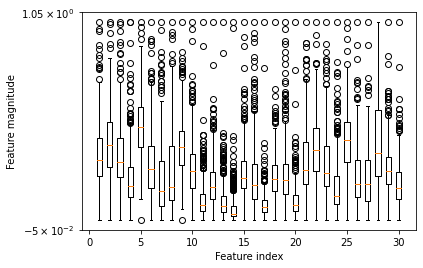

In [36]:
# Visualization
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

### Multilayer Perceptron (MLP)

In [37]:
# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [38]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

print("Training set score: {:.3f}".format(mlp_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp_model.score(X_test, y_test)))

Training set score: 0.939
Test set score: 0.916


In [39]:
mlp_model_1 = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
mlp_model_1.fit(X_train, y_train)

print("Training set score: {:.3f}".format(mlp_model_1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp_model_1.score(X_test, y_test)))

Training set score: 0.932
Test set score: 0.944


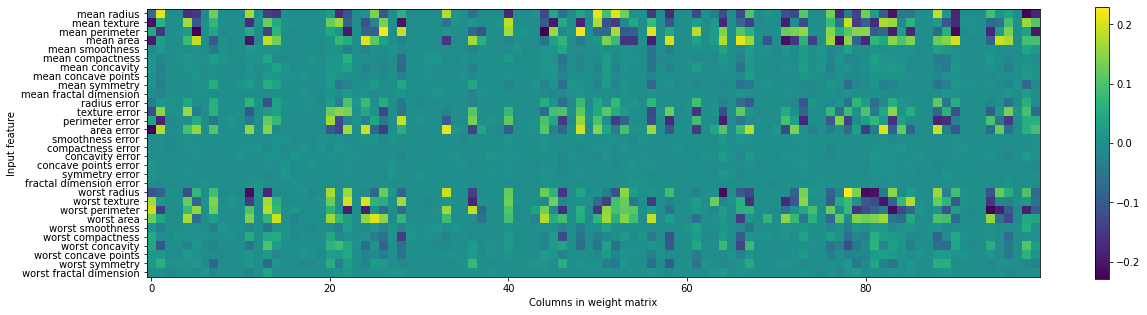

In [40]:
# Visualization
plt.figure(figsize=(20, 5))
plt.imshow(mlp_model_1.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()